<a href="https://colab.research.google.com/github/Naitik582/Customer_Segmentation_Analysis/blob/main/Ifood_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df.csv


In [3]:
import pandas as pd

print ("Data Cleaning")
file_path = "ifood_df.csv"

df = pd.read_csv(file_path)

df.head()

Data Cleaning


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

categorical_columns = ['Kidhome', 'Teenhome', 'Complain', 'Response']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Descriptive Statistics for Numerical Columns:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.

In [ ]:
print ("1 Feature Selection & Engineering")
selected_features = ['Income', 'Recency', 'MntTotal', 'Age',
                     'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']

df_selected = df[selected_features]
print("\nSelected Features:\n", df_selected.head())

1 Feature Selection & Engineering

Selected Features:
     Income  Recency  MntTotal  Age  NumWebPurchases  NumCatalogPurchases  \
0  58138.0       58      1529   63                8                   10   
1  46344.0       38        21   66                1                    1   
2  71613.0       26       734   55                8                    2   
3  26646.0       26        48   36                2                    0   
4  58293.0       94       407   39                5                    3   

   NumStorePurchases  NumWebVisitsMonth  
0                  4                  7  
1                  2                  5  
2                 10                  4  
3                  4                  6  
4                  6                  5  


In [ ]:
print ("2 Feature Selection & Engineering")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

df_scaled = pd.DataFrame(df_scaled, columns=selected_features)

print("\nScaled Data Sample:\n", df_scaled.head())

2 Feature Selection & Engineering

Scaled Data Sample:
      Income   Recency  MntTotal       Age  NumWebPurchases  \
0  0.314651  0.310830  1.678056  1.017189         1.424772   
1 -0.254877 -0.380600 -0.940880  1.273530        -1.132957   
2  0.965354 -0.795458  0.297384  0.333612         1.424772   
3 -1.206087 -0.795458 -0.893989 -1.289883        -0.767567   
4  0.322136  1.555404 -0.270516 -1.033542         0.328602   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0             2.628526          -0.562650           0.689203  
1            -0.588043          -1.179732          -0.139645  
2            -0.230646           1.288596          -0.554069  
3            -0.945440          -0.562650           0.274779  
4             0.126750           0.054432          -0.139645  


Clustering K-means


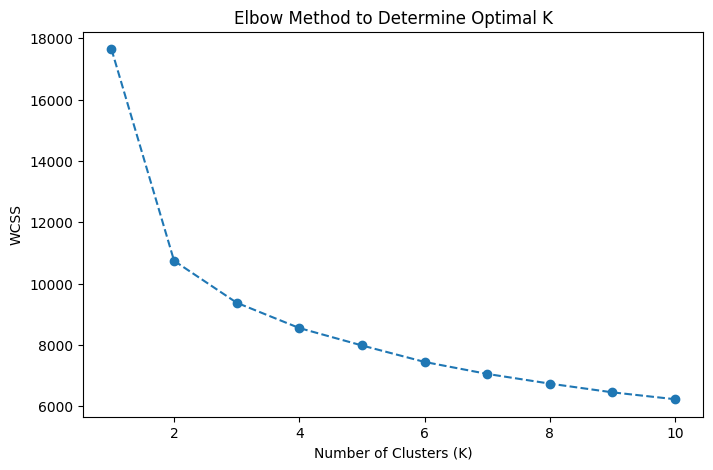

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
print ("Clustering K-means")
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

In [ ]:
print ("K-means Clustering")
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df['Cluster'] = df_scaled['Cluster']
print("\nCluster Counts:\n", df['Cluster'].value_counts())

K-means Clustering

Cluster Counts:
 Cluster
2    581
3    560
1    535
0    529
Name: count, dtype: int64


Cluster Visualization


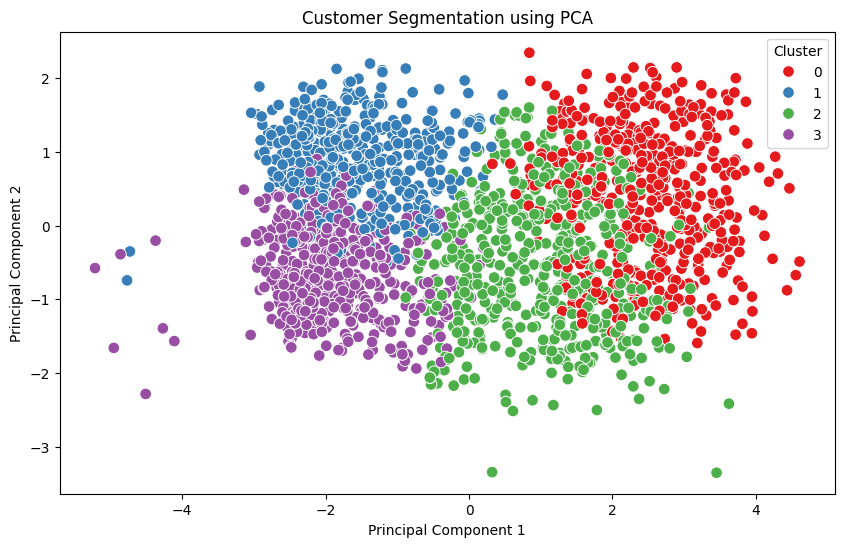

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
print ("Cluster Visualization")

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_scaled['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='Set1', s=70)
plt.title("Customer Segmentation using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

Spending Behaviour Analysis Of Cluster Visualization


<ipython-input-34-85549867e827>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['Income'], palette='Set2')
<ipython-input-34-85549867e827>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['MntTotal'], palette='Set2')


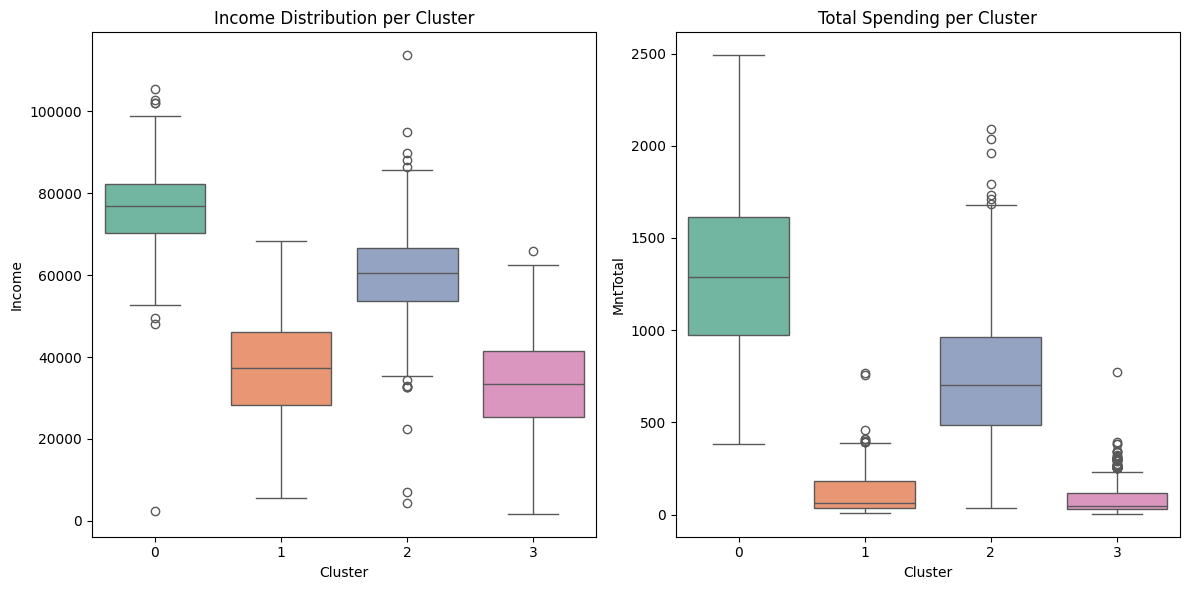

In [ ]:
print ("Spending Behaviour Analysis Of Cluster Visualization")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Cluster'], y=df['Income'], palette='Set2')
plt.title("Income Distribution per Cluster")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Cluster'], y=df['MntTotal'], palette='Set2')
plt.title("Total Spending per Cluster")

plt.tight_layout()
plt.show()

In [ ]:
!pip install gtts

In [ ]:
from IPython.display import display, Markdown
from gtts import gTTS
import os

recommendations = [
    "**1. Calories:** Some items go up to **1880 kcal**. Pick lower-calorie options like **Egg White Delight (250 kcal)** if watching weight.",
    "**2. Fat:** Some meals have **1000+ kcal from fat**. Avoid high-fat foods and pick ones with **less than 20g fat**.",
    "**3. Saturated & Trans Fat:** Bad for the heart. Choose meals with **less than 5g saturated fat** and **zero trans fat**.",
    "**4. Carbs & Sugar:** Some items have **140g carbs** and **128g sugar**. Avoid high sugar foods, aim for **below 30g sugar**.",
    "**5. Protein:** More than **20g protein** is good."
]

display(Markdown("### **Recommendations**"))
for rec in recommendations:
    display(Markdown(rec))  # Bold text display
    tts = gTTS(text=rec, lang='en')  # Convert text to speech
    tts.save("rec.mp3")  # Save as MP3
    os.system("mpg321 rec.mp3")  # Play in Colab (Linux)

report = "\n".join(recommendations)

with open("recommendations_report.txt", "w") as file:
    file.write(report)

print("Report saved as 'recommendations_report.txt'")

### **Recommendations**

**1. Calories:** Some items go up to **1880 kcal**. Pick lower-calorie options like **Egg White Delight (250 kcal)** if watching weight.

**2. Fat:** Some meals have **1000+ kcal from fat**. Avoid high-fat foods and pick ones with **less than 20g fat**.

**3. Saturated & Trans Fat:** Bad for the heart. Choose meals with **less than 5g saturated fat** and **zero trans fat**.

**4. Carbs & Sugar:** Some items have **140g carbs** and **128g sugar**. Avoid high sugar foods, aim for **below 30g sugar**.

**5. Protein:** More than **20g protein** is good.

Report saved as 'recommendations_report.txt'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')